# Learning Objectives


Replacing inefficient Pyth on loops, large trip count loops that perform low level operations, will negativley impact numeric computation performance.

Replacing such loops has the following benefits, which are related to this modules learning objectives.

| PyTorch UFUNCs | NumPy UFUNCs | Description |
| --- | --- | --- |
| torch.sigmoid(x)|1 / (1 + np.exp(-x))| **Sigmoid Function** |
| torch.nn.Softmax() | np.exp(x)/np.exp(x).sum()| **Softmax function** |
| torch.nn.CrossEntropyLoss() | 1.0 / (1.0 + np.exp(-x))| **Cross Entropy Loss** |
| torch.nn.KLDivLoss() | np.sum(p * np.log(p/q) | **Kullback-Leibler Divergence (KL)** |

Code will be:
    
- More **readable**
- More **maintainable** for the developer
- Maintained by 3rd parties who invest THEIR time perfecting the algorithm
- **Faster** on existing hardware
- Faster on future enhancements to hardware platforms and 3rd party library developments

### Learning Objectives
At the end of this module you will be able to:
- Apply NumPy vectorized libraies for inefficient loopy code
- Describe the benefits of using NumPy as an alternative to your "roll your code"

**To run the lab**: These step could be run on a laptop - NOT REQUIRED for DevCloud!
**Laptop Requirements:**

```bash
conda config --add channels intel
conda install numpy
conda install scipy
conda install update pandas
```

## Python loops are bad for performance

**Python is great!** Its a great language for AI. There are many, many advantages in using Python especially for data science.

- Easy to program (don’t worry about data types and fussy syntax at least relative to C/C++ and other languages
- FAST for developing code!
- Leverages huge array of libraries to conquer any domain
- Lots of quick answers to common issues in Stack Exchange

**Python, however, is slow for Massively repeating small tasks** - such as found in loops! 
-Python loops are SLOW
-Compared to C, C++, Fortran and other typed languages
-Python is forced to look up every occurrence and type of variable in a loop to determine what operations it can perform on that data type
-It cannot usually take advantage of advances in hardware in terms of vector width increases, multiple cores, new instructions from a new HW instruction set, new AI accelerators, effective cache memory layout, and more

**BUT: Python has library remedies to these ills!**

Importing key libraries shift the burden of computation to highly efficient code.

**NumPy**, for example, through its focus on elementwise efficient operations, gives indirect access to the efficiencies afforded in "C"

libraries included in oneAPI and NumPy, SciPy, Scikit-learn all powered by Intel(r) oneAPI give access to modern advancements in hardware level: access to better cache and memory usage, access to low level vector instructions, and more.

By leveraging packages such as these powered by oneAPI AND keeping libraries up to date, more capability is added to your underlying frameworks so that moving code, especially in a cloud world, can give you ready access to hardware acceleration, in many cases, without having to modify code this vectorized code
Routines are written in C (based on Cython framework)

NumPy arrays are densely packed arrays of homogeneous type. 

Python lists, by contrast, are arrays of pointers to objects, even when all of them are of the same type. So, you get the benefits of not having to check data types, and you also get locality of reference. Also, many NumPy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. The speed boost depends on which operations you’re performing.

Goal of this module: **Search and destroy (replace) loops**

- Avoid loops if you can - find an alternative if possible. 
- Sometimes it cannot be done - true data dependencies may limit our options. But many, many time there are alternatives.

**The problem**

- Loops isolate your code from hardware and software advances that update frequently.
- They prevent you from effectively using key underlying resources - it is a waste.
- They consume your time!
- They can waster energy!


## Reference:

Video: Losing your Loops Fast Numerical Computing with NumPy by Jake VanderPlas .

Book: Python Data Science Handbook by Jake VanderPlas.

Book: Elegant SciPy: The Art of Scientific Python by by Juan Nunez-Iglesias, Stéfan van der Walt, Harriet Dashnow

Article: The Ultimate NumPy Tutorial for Data Science Beginners : by Aniruddha April 28, 2020 at www.analyticsvidhya.com

Academic Lecture pdf: Vectorization by Aaron Birkland Cornell CAC



# Exercise: Compute Mean & Std of array

Below is an example of a loop based way to compute the mean and standard deviation for a list or vector of values

```python
for i in range (len(a)):
    S += a[i]
mean = S/len(a)
std = 0
for i in range (len(a)):
    d = a[i] - mean
    std += d*d
std = np.sqrt(std/len(a))
print("mean", mean)
print("std", std)
```

In the following exercise, replace this code with a more readbale and maintainable NumPy vectorized variant as follows:

```python
print(a.mean())
print(a.std())
```


In [1]:
import numpy as np
import torch
import time
import math

rng = np.random.default_rng(2021)
# random.default_range is the recommended method for generated random's
# see blog "Stop using numpy.random.seed()" for reasoning
# https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

a = rng.random((10_000_000,))
a_torch = torch.from_numpy(a)
t1 = time.time()
timing = {}
S = 0

################################ code to replace in next cell ##############
for i in range (len(a)):
    S += a[i]
mean = S/len(a)
std = 0
for i in range (len(a)):
    d = a[i] - mean
    std += d*d
std = np.sqrt(std/len(a))
print("mean", mean)
print("std", std)
############################################################################
timing['loop'] = time.time() - t1


print(timing)

mean 0.49989965005579506
std 0.2886808095773652
{'loop': 1.7517545223236084}


# Show Intel oneMKL-DNN under the hood

In [2]:
print(torch.__config__.parallel_info())

ATen/Parallel:
	at::get_num_threads() : 16
	at::get_num_interop_threads() : 16
OpenMP 201511 (a.k.a. OpenMP 4.5)
	omp_get_max_threads() : 16
Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
	mkl_get_max_threads() : 16
Intel(R) MKL-DNN v3.1.1 (Git Hash N/A)
std::thread::hardware_concurrency() : 32
Environment variables:
	OMP_NUM_THREADS : [not set]
	MKL_NUM_THREADS : [not set]
ATen parallel backend: OpenMP



## Excercise: use NumPy mean and std
This cell will error - fix the error

Hint:

```python
print(a.mean())
print(a.std())
```

In [3]:
t1 = time.time()
##### insert NumPy code here ###############
#print(np.xxx())
print(a.mean())
print(a.std())  
############################################

timing['numpy'] = time.time() - t1
print(timing)
print(f"NumPy Acceleration {timing['loop']/timing['numpy']:4.1f} X")

t1 = time.time()
##### insert NumPy code here ###############
#print(np.xxx())
print(a_torch.mean())
print(a_torch.std())  
############################################

timing['numpy'] = time.time() - t1
print(timing)
print(f"PyTorch Acceleration {timing['loop']/timing['numpy']:4.1f} X")

0.4998996500557974
0.288680809577358
{'loop': 1.7517545223236084, 'numpy': 0.029892683029174805}
NumPy Acceleration 58.6 X
tensor(0.4999, dtype=torch.float64)
tensor(0.2887, dtype=torch.float64)
{'loop': 1.7517545223236084, 'numpy': 0.006890773773193359}
PyTorch Acceleration 254.2 X


```python
rng = np.random.default_rng(2021)
a = rng.random((10_000_000,))
a = rng.random((10_000_000,))
a_torch = torch.from_numpy(a)
```

In [4]:
t1 = time.time()
##### insert NumPy code here ###############
#print(np.xxx())
a.mean()
a.std()
############################################

timing['numpy'] = time.time() - t1
print(f"NumPy Acceleration   {timing['loop']/timing['numpy']:4.1f} X")

t1 = time.time()
##### insert NumPy code here ###############
#print(np.xxx())
a_torch.mean()
a_torch.std() 
############################################

timing['numpy'] = time.time() - t1
print(f"PyTorch Acceleration {timing['loop']/timing['numpy']:4.1f} X")

NumPy Acceleration   70.7 X
PyTorch Acceleration 368.7 X


<BarContainer object of 2 artists>

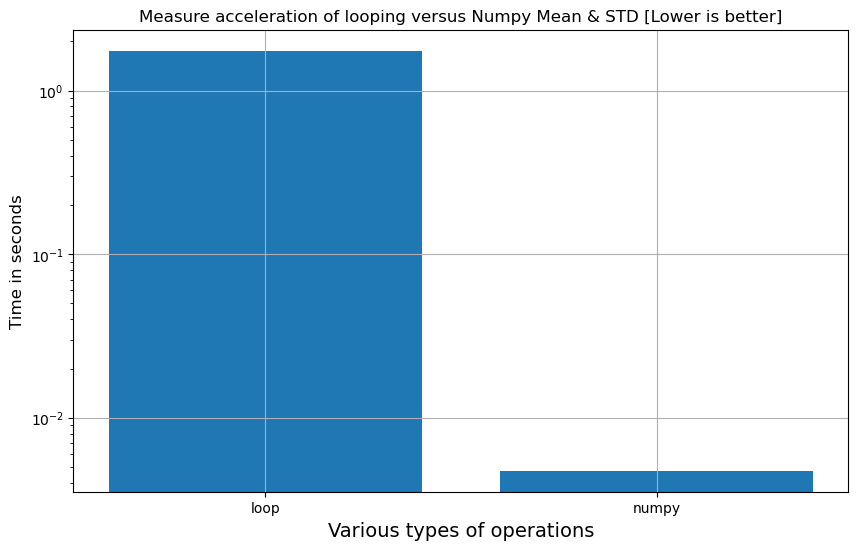

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy Mean & STD [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.yscale('log')
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

# Cross Entropy

Cross entropy calculates are done all the time in machine learning. consider  the loopy stream of consciousness variant of computing cross entropy below, as seen in the next cell. Try your hand at removing the loop and using the NumPy Ufunc, aggregation or other NumPy construct to make this code more readable and faster.

###  Logistic Regression

probability of y=1

# $ \hat{y} = q_{(y=1)} = g(w,x) = \frac{1}{1 + e^{-wx}} $ 

probability of y = 0


# $ q_{(y=1)} = 1-\hat{y}$

w = weights

x = input vector


## cross-entropy to get a measure of dissimilarity between p and q

# $ H(p,q) =  - \Sigma p_i log(q_i) = -y log \hat{y} - (1-y) log(1-\hat{y}) $


# Slow python method

time timing: 0.382 sec


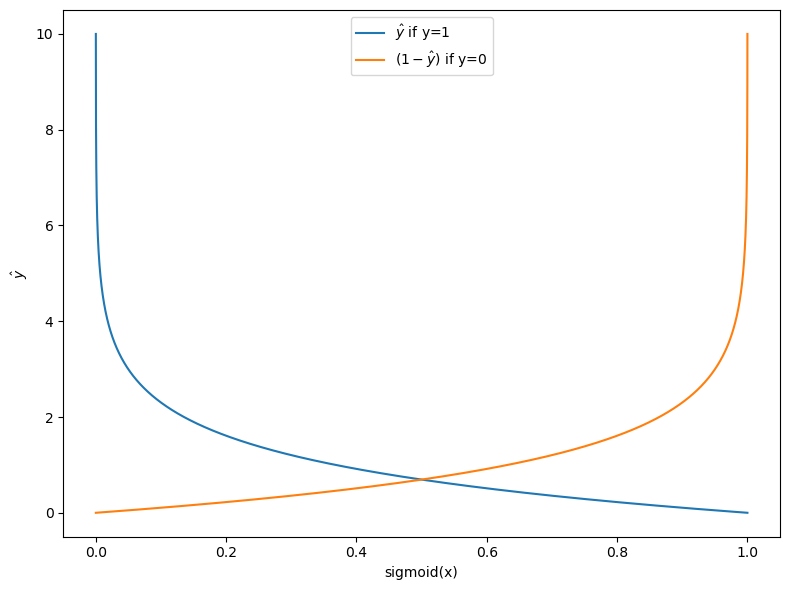

In [6]:
import matplotlib.pyplot as plt
import math
from math import log2
import numpy as np
import time
# Sigmoid function

timing = {}

######################### This is the targted function for this exercise ######
def sigmoid_slow(z):
    sig = [1.0/(1.0+math.exp(-1*xi)) for xi in z]
    return sig
###############################################################################


# yHat represents the predicted value / probability value calculated as output of hypothesis / sigmoid function
 
# y represents label

# cross_entropy list comprehension method

def cross_entropy_loss_slow(yHat, y):
    if y == 1:
        return [-1*math.log(yi) for yi in yHat]
    else:
        return [-1*math.log(1.0 - yi) for yi in yHat]
   
x = [xi/100_000. for xi in range(-1_000_000, 1_000_000)]  # num between -10 and 10 step .00001
p = x
q = []
start = time.time()
sig_x = sigmoid_slow(x)
cost_1 = cross_entropy_loss_slow(sig_x, 1)
cost_0 = cross_entropy_loss_slow(sig_x, 0)
timing['list comprehension'] = time.time() - start
print(f"time timing: {timing['list comprehension']:5.3f} sec")
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(sig_x, cost_1, label='$ \hat{y} $ if y=1')
plt.plot(sig_x, cost_0, label='$ (1 - \hat{y} )$ if y=0')
plt.xlabel('sigmoid(x)')
plt.ylabel('$ \hat{y}$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Hint:

```python
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
```

time elapsed: 0.048 sec
Acceleration:   8.0X


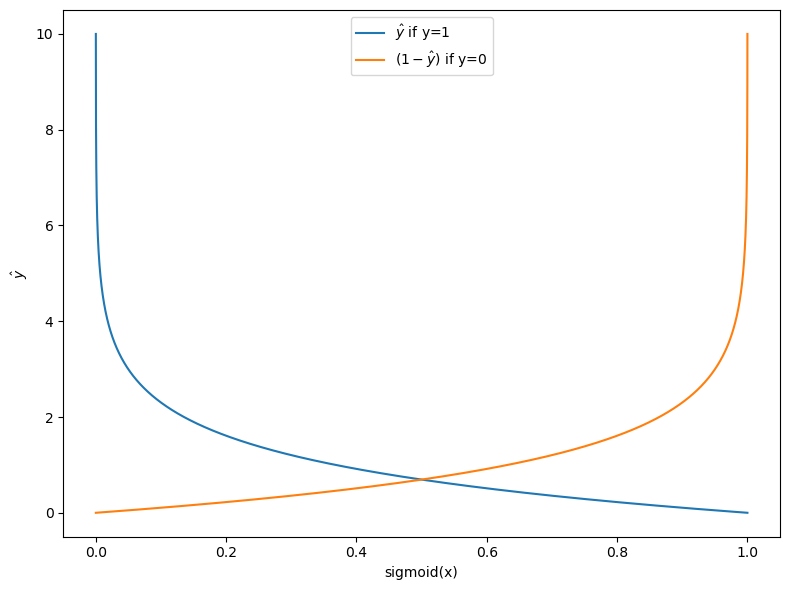

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# Sigmoid function NumPy
def sigmoid(z):
##### insert improved NumPy code here
    return 1.0 / (1.0 + np.exp(-z))
#####################################


# yHat represents the predicted value / probability value calculated as output of hypothesis / sigmoid function
 
# y represents label

# cross_entropy NumPy method

def cross_entropy_loss(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)
    
x = np.arange(-10, 10, 0.00001)
start = time.time()
sig_x = sigmoid(x)
cost_1 = cross_entropy_loss(sig_x, 1)
cost_0 = cross_entropy_loss(sig_x, 0)

timing['numpy'] = time.time() - start
print(f"time elapsed: {timing['numpy']:5.3f} sec")

ratio = timing['list comprehension']/timing['numpy']
print(f'Acceleration: {ratio:5.1f}X')

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(sig_x, cost_1, label='$ \hat{y} $ if y=1')
plt.plot(sig_x, cost_0, label='$ (1 - \hat{y} )$ if y=0')
plt.xlabel('sigmoid(x)')
plt.ylabel('$ \hat{y}$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<BarContainer object of 2 artists>

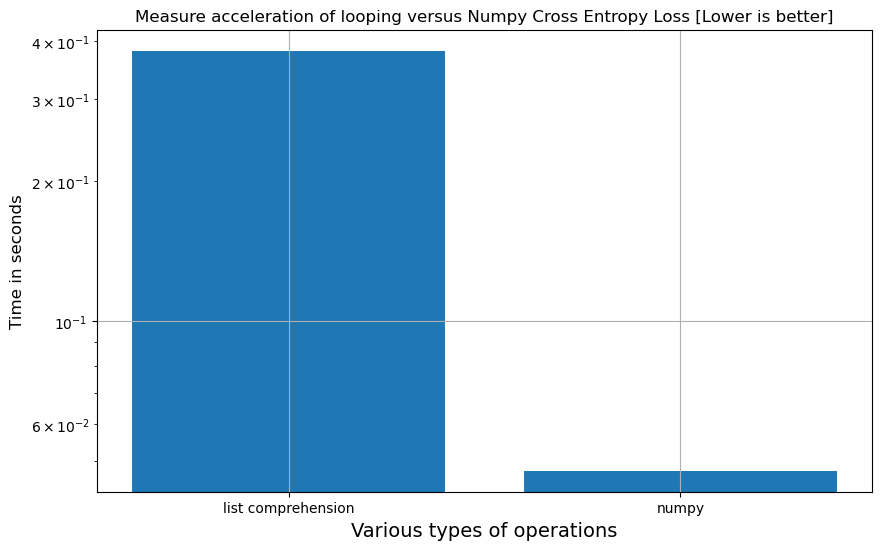

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy Cross Entropy Loss [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.yscale('log')
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

# Softmax Loop

Another Algorithm that's used all the time in machine learning is Softmax.

The softmax function, or normalized exponential function, converts a vector of K real numbers into a probability distribution of K possible outcomes.

### Below is slower python for loop method

In [114]:
import numpy as np
import torch
import time
import math
from sys import getsizeof

timing = {}
np.random.seed(seed=42)
BIG = 10_000_000
b = list(np.random.rand(BIG))
def softmax_slow(x):
    denominator = 0.0
    for xi in x:
        denominator += math.exp(xi)
    return [math.exp(xi)/denominator for i, xi in enumerate(x)]
start = time.time()
softmax_slow(b)
timing['softmax_loop'] = time.time() - start
print(f"time elapsed: {timing['softmax_loop']:5.3f} sec")
#print(f'memory: {getsizeof(b):,}')


time elapsed: 0.933 sec


# Softmax NumPy & PyTorch

More Readable/Maintainable/Faster numpy method:

```python
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())  # one line of code, no loop indices 
```

In [115]:
np.random.seed(seed=42)
b = np.random.rand(BIG)
b_torch = torch.from_numpy(b)

def softmax_numpy(x):
    ########### insert solu"tion here
    return(np.exp(x)/np.exp(x).sum())  # one line of code, no loop indices 
    ################################
    
def softmax_torch(x):
    #doIt = torch.nn.Softmax(dim=0)
    #return doIt(x)
    return(torch.exp(x)/torch.exp(x).sum())


start = time.time()
softmax_numpy(b)
timing['softmax_numpy'] = time.time() - start
print(f"time elapsed: {timing['softmax_numpy']:5.3f} sec")
ratio = timing['softmax_loop'] / timing['softmax_numpy'] 
print(f'NumPy Acceleration: {ratio:5.4g}X')
print(softmax_numpy(b))

    
start = time.time()
softmax_torch(b_torch)
timing['softmax_pytorch'] = time.time() - start
print(f"time elapsed: {timing['softmax_pytorch']:5.3f} sec")
ratio = timing['softmax_loop'] / timing['softmax_pytorch'] 
print(f'PyTorch Acceleration: {ratio:5.4g}X')
print(softmax_torch(b_torch))


time elapsed: 0.051 sec
NumPy Acceleration: 18.25X
[8.46389393e-08 1.50591161e-07 1.21006984e-07 ... 1.47990629e-07
 7.43663206e-08 8.58622599e-08]
time elapsed: 0.012 sec
PyTorch Acceleration: 75.58X
tensor([8.4639e-08, 1.5059e-07, 1.2101e-07,  ..., 1.4799e-07, 7.4366e-08,
        8.5862e-08], dtype=torch.float64)


<BarContainer object of 3 artists>

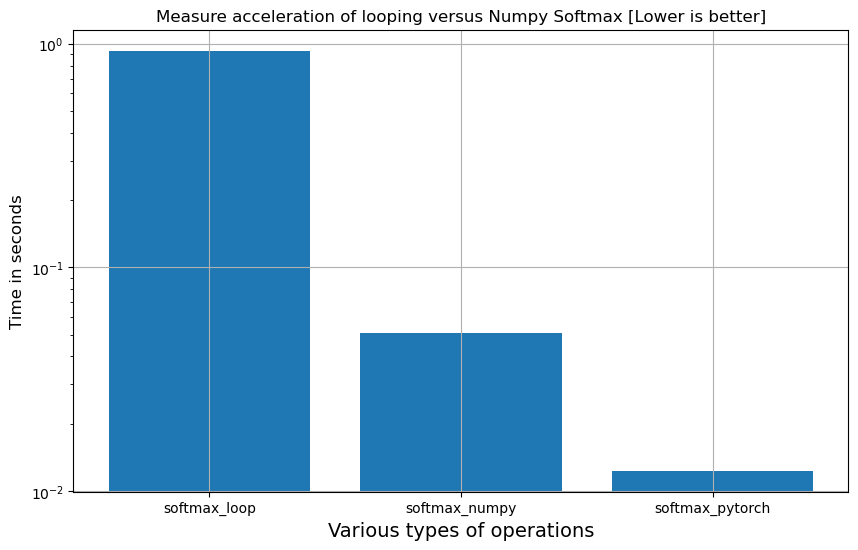

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy Softmax [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.yscale('log')
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

# Kullback-Leibler Divergence (KL)

KL divergence score, describes how much one probability distribution differs from a different probability distribution.

It is fairly widely used in the data mining literature and as a key ingredient in Variational Auto Encoders. The concept was originated in probability theory and information theory.

A KL of zero reflects two distributions that are the same

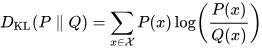

- Which is easier to read and maintain?

- Which is faster?

### Naive Loop

```python

def kl_divergence(p, q):
    s = []
    for i in range(len(p)):
        s.append(p[i] * log(p[i]/q[i]))
    return sum(s)
```

### NumPy vector

```python
def kl_divergence(p, q):
    return np.sum(p * np.log(p/q))
```

In [202]:
def kl_divergence_slow(p, q):
    s = []
    for i in range(len(p)):
        s.append(p[i] * log(p[i]/q[i]))
    return sum(s)

# Compute, Print Naive KL Loop, Naive Softmax

In [203]:
from math import log
timing = {}
start = time.time()
np.random.seed(seed=42)
BIG = 10_000_000
p = softmax_slow(np.random.rand(BIG))
q = softmax_slow(np.random.rand(BIG))
# calculate (P || Q)
kl_pq = kl_divergence_slow(p, q)
print('KL(P || Q): %.3f nats' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence_slow(q, p)
print('KL(Q || P): %.3f nats' % kl_qp)
timing['naiveLoop'] = time.time() - start

# plot of distributions
from matplotlib import pyplot

print(f'timing Naive KL w Softmax Loops: {timing["naiveLoop"]:.2f} sec')
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
del p
del q

KL(P || Q): 0.082 nats
KL(Q || P): 0.082 nats
timing Naive KL w Softmax Loops: 4.08 sec
P=1.000 Q=1.000


# SciPy equivalent: rel_entr

In [204]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr
# define distributions
start = time.time()
np.random.seed(seed=42)
p = softmax_numpy(np.random.rand(BIG))
q = softmax_numpy(np.random.rand(BIG))
# calculate (P || Q)

###### SciPy equvalent ##################
kl_pq = rel_entr(p, q)
#########################################

print('KL(P || Q): %.3f nats' % sum(kl_pq))
# calculate (Q || P)

###### SciPy equvalent ##################
kl_qp = rel_entr(q, p)
#########################################

print('KL(Q || P): %.3f nats' % sum(kl_qp))
timing['SciPy'] = time.time() - start
print(f'timing SciPy: {timing["SciPy"]:.2f} sec')


KL(P || Q): 0.082 nats
KL(Q || P): 0.082 nats
timing SciPy: 0.83 sec


# Compute Naive KL Loop, NumPy Softmax

In [205]:
start = time.time()
np.random.seed(seed=42)
p = softmax_numpy(np.random.rand(BIG))
q = softmax_numpy(np.random.rand(BIG))
# calculate (P || Q)
kl_pq = kl_divergence_slow(p, q)
print('KL(P || Q): %.3f nats' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence_slow(q, p)
print('KL(Q || P): %.3f nats' % kl_qp)
timing['naiveLoopFastSoftMax'] = time.time() - start

# plot of distributions
from matplotlib import pyplot
# define distributions
print(f'timing NaiveLoopNumPySoftmax: {timing["naiveLoopFastSoftMax"]:.2f} sec')
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
del p,q

KL(P || Q): 0.082 nats
KL(Q || P): 0.082 nats
timing NaiveLoopNumPySoftmax: 4.03 sec
P=1.000 Q=1.000


# Compute NumPy KL Loop, NumPy Softmax

In [206]:
def kl_divergence(p, q):
    return np.sum(p * np.log(p/q))


In [207]:
# define distributions
start = time.time()
np.random.seed(seed=42)
p = softmax_numpy(np.random.rand(BIG))
q = softmax_numpy(np.random.rand(BIG))
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f nats' % np.sum(kl_pq))
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f nats' % np.sum(kl_qp))
timing['NumPyFastAll'] = time.time() - start
print(f'timing naiveFastAll: {timing["NumPyFastAll"]:.2f} sec')
kl_qp

KL(P || Q): 0.082 nats
KL(Q || P): 0.082 nats
timing naiveFastAll: 0.24 sec


0.08196512471922866

# Compute NumPy KL Loop, PyTorch Softmax

Something is wrong with PyTorch code 

See if you can get it to match NumPy code

In [213]:
import torch

def kl_divergence_loss(p, q):
    criterion = torch.nn.KLDivLoss(reduction='batchmean')
    loss = criterion(torch.log(p), q)
    #loss = criterion((p), q)
    return loss
start = time.time()      
kl_divergence_loss(torch.Tensor(p), torch.Tensor(q)) 
timing['pytorch_NOT_SAME_RESULT'] = time.time() - start  

# Notice: differences in values computed

In [214]:
kl_qp/BIG, kl_divergence_loss(torch.Tensor(p), torch.Tensor(q)).detach().numpy()

(8.196512471922867e-09, array(8.196513e-09, dtype=float32))

Acceleration :   274 X


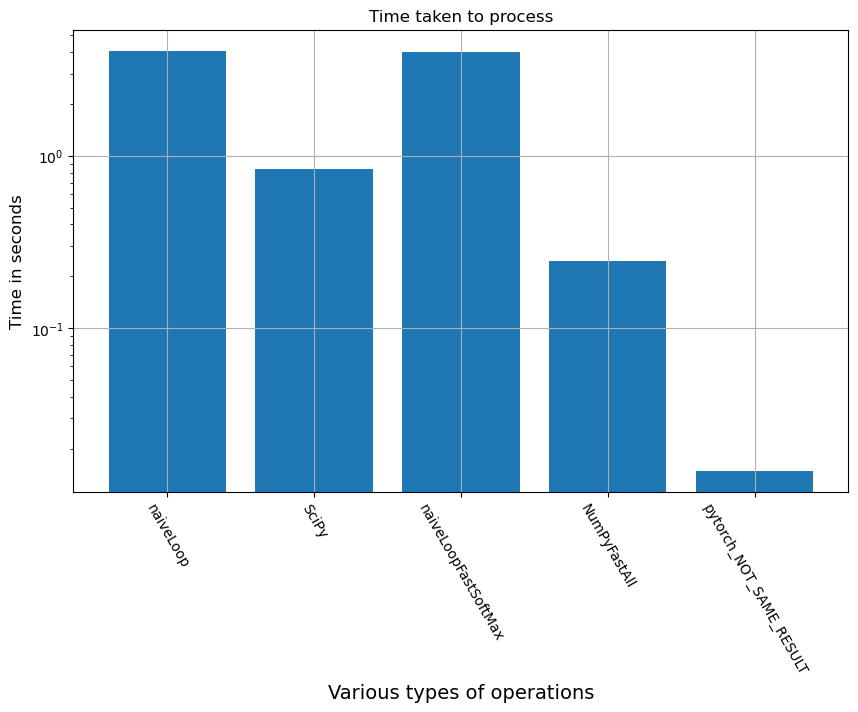

In [215]:
plt.figure(figsize=(10,6))
plt.title("Time taken to process" ,fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.yscale('log')
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))
print('Acceleration : {:5.0f} X'.format(timing['naiveLoop']/(timing['pytorch_NOT_SAME_RESULT'])))

# Notices and Disclaimers

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure. 

Your costs and results may vary. 

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. Other names and brands may be claimed as the property of others. 
